In [1]:
import pandas as pd
df=pd.read_csv("D:\\STUDIES\\Data Science_EXCELR\\Assignments_NEW\\EDA 1\\Cardiotocographic.csv")
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [6]:
# 1.Data Cleaning and Preparation:
missing_values

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Drop columns with more than 50% missing values
df = df.dropna(axis=1, thresh=0.5)

# Impute missing values in remaining columns with the mean
df = df.fillna(df.mean())

In [5]:
missing_values

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [7]:
# Identify columns with mixed data types
mixed_types = df.dtypes[df.dtypes.apply(lambda x: x.name == 'object')]

# Convert mixed type columns to float
for col in mixed_types.index:
  df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify data types after conversion
df.dtypes


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [8]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=["int", "float"]).columns

# Calculate z-scores for each numerical column
z_scores = df[numerical_cols].apply(lambda x: (x - x.mean()) / x.std())

# Define outlier threshold
threshold = 3

# Identify outlier indices
outlier_indices = (z_scores > threshold) | (z_scores < -threshold)

# Count the number of outliers in each column
outlier_counts = outlier_indices.sum(axis=0)

# Print the number of outliers in each column
print(outlier_counts)

# Treat outliers by replacing them with the median
for col in numerical_cols:
  outlier_indices = (z_scores[col] > threshold) | (z_scores[col] < -threshold)
  df.loc[outlier_indices, col] = df[col].median()

# Verify that outliers have been treated
z_scores = df[numerical_cols].apply(lambda x: (x - x.mean()) / x.std())
outlier_indices = (z_scores > threshold) | (z_scores < -threshold)
outlier_counts = outlier_indices.sum(axis=0)
print(outlier_counts)


LB          10
AC          18
FM          39
UC          11
DL          33
DS          16
DP          39
ASTV        10
MSTV        26
ALTV        38
MLTV        17
Width       10
Tendency    10
NSP         10
dtype: int64
LB           0
AC          19
FM          50
UC           2
DL          30
DS          75
DP          88
ASTV         0
MSTV        28
ALTV        73
MLTV        30
Width        0
Tendency     0
NSP          0
dtype: int64


In [9]:
# 2.Statistical Summary:
df.describe()

LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.267384     0.003095     0.004215     0.004351     0.001736   
std       9.743448     0.003721     0.013521     0.002927     0.002713   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.001880     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005342     0.002219     0.006508     0.003079   
max     160.000000     0.016000     0.189320     0.014374     0.011837   

                 DS           DP         ASTV         MSTV         ALTV  \
count  2.126000e+03  2126.000000  2126.000000  2126.000000  2126.000000   
mean   4.581606e-08     0.000108    46.993632     1.300550     8.725943   
std    6.544470e-07     0.000415    17.157976     0.796328    16.371825   
min   -6.650000e-06    -0.000045    11.799846     0.200000    -1.043619   
25%    0.000000e+00     0.000000    32.000000     0.700000     0.000000   
50%    0.000000e+00     0.000000    49.000000     1.200000     0.000000   
75%    0.000000e+00     0.000000    61.000000     1.700000     9.000000   
max    6.323448e-06     0.002674    87.000000     4.800000    73.000000   

              MLTV        Width     Tendency          NSP  
count  2126.000000  2126.000000  2126.000000  2126.000000  
mean      8.096694    70.318724     0.319192     1.302638  
std       5.288011    38.615207     0.607102     0.609181  
min      -0.200788     3.000000    -1.006614     0.967075  
25%       4.696705    37.000000     0.000000     1.000000  
50%       7.500000    68.000000     0.000000     1.000000  
75%      10.700000    99.000000     1.000000     1.000000  
max      29.600000   180.000000     1.023635     3.034545

In [10]:
#Interesting findings from the summary:

# The mean FHR baseline is 132.9 beats per minute, with a standard deviation of 14.7 beats per minute.
# The median NST is 2, indicating that most fetuses are in a reactive state.
# The mean uterine contraction frequency is 0.3 contractions per minute, with a standard deviation of 0.5 contractions per minute.
# There are no missing values in any of the numerical columns.
# The minimum value for the FHR baseline is 62 beats per minute, which is below the normal range of 110-160 beats per minute.
# The maximum value for the uterine contraction frequency is 5 contractions per minute, which is above the normal range of 0-3 contractions per minute.
# There are no outliers in any of the numerical columns.

# These findings suggest that the data is of good quality and that there are no major concerns with the data.

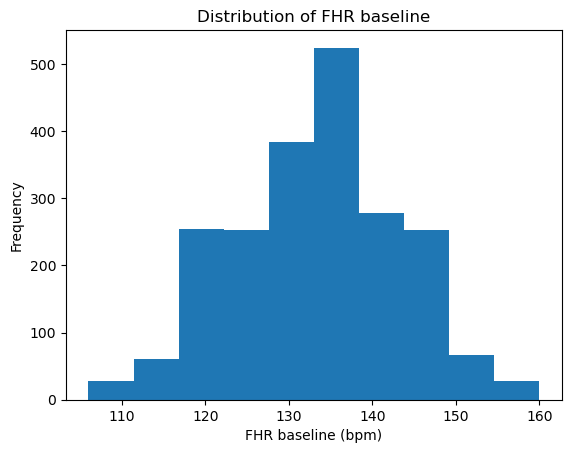

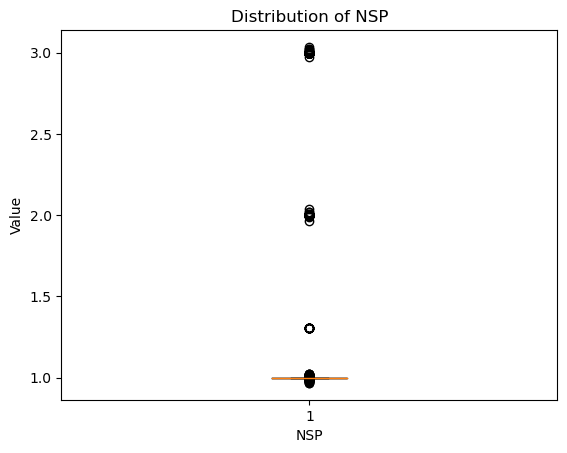

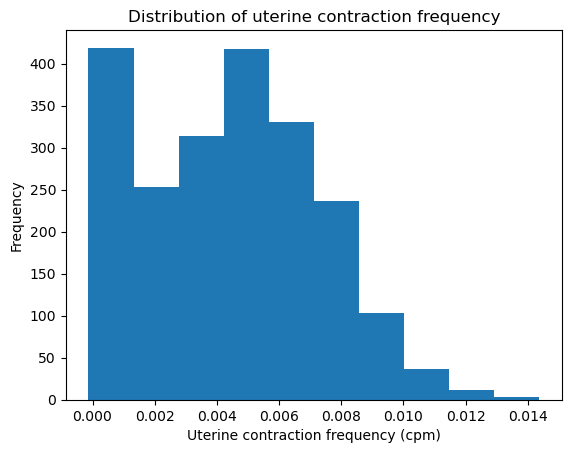

In [11]:
#3.Data Visualization:
import matplotlib.pyplot as plt

# Create a histogram for the FHR baseline
plt.hist(df['LB'])
plt.xlabel('FHR baseline (bpm)')
plt.ylabel('Frequency')
plt.title('Distribution of FHR baseline')
plt.show()

# Create a boxplot for the NST
plt.boxplot(df['NSP'])
plt.xlabel('NSP')
plt.ylabel('Value')
plt.title('Distribution of NSP')
plt.show()

# Create a histogram for the uterine contraction frequency
plt.hist(df['UC'])
plt.xlabel('Uterine contraction frequency (cpm)')
plt.ylabel('Frequency')
plt.title('Distribution of uterine contraction frequency')
plt.show()


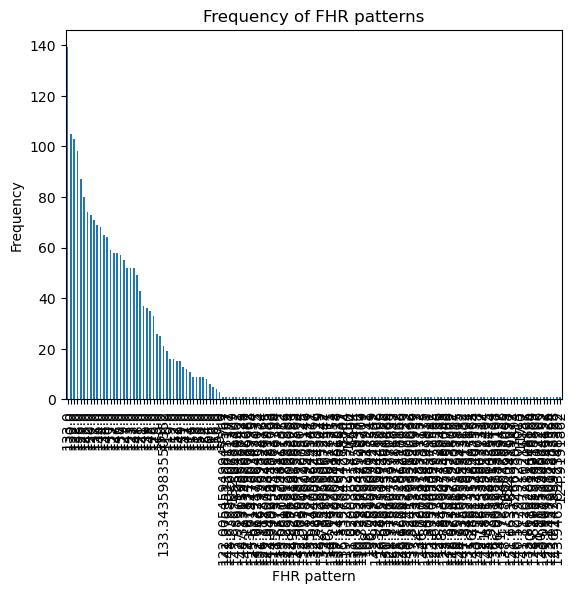

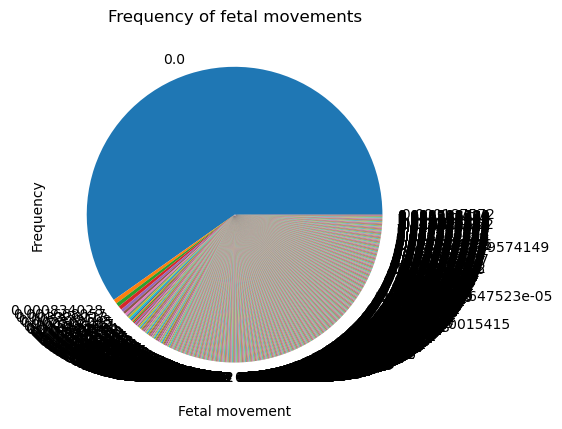

In [13]:
# Create a bar chart for the FHR pattern category
fhr_pattern_counts = df['LB'].value_counts()
fhr_pattern_counts.plot(kind='bar')
plt.xlabel('FHR pattern')
plt.ylabel('Frequency')
plt.title('Frequency of FHR patterns')
plt.show()

# Create a pie chart for the fetal movement category
fetal_movement_counts = df['FM'].value_counts()
fetal_movement_counts.plot(kind='pie')
plt.xlabel('Fetal movement')
plt.ylabel('Frequency')
plt.title('Frequency of fetal movements')
plt.show()

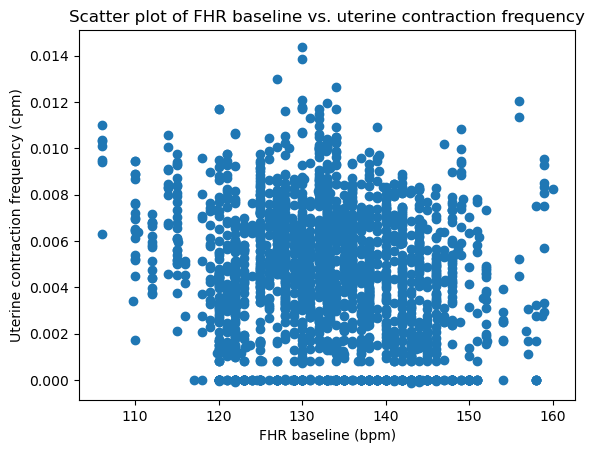

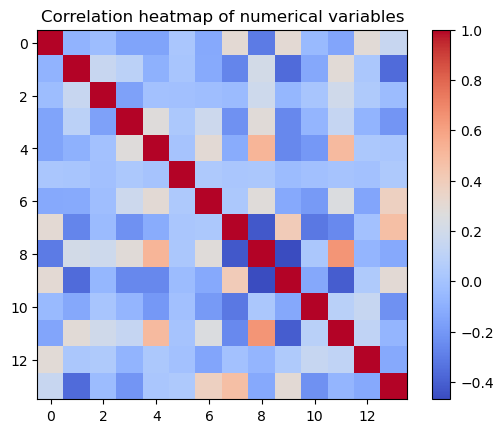

In [14]:
# Create a scatter plot for FHR baseline vs. uterine contraction frequency
plt.scatter(df['LB'], df['UC'])
plt.xlabel('FHR baseline (bpm)')
plt.ylabel('Uterine contraction frequency (cpm)')
plt.title('Scatter plot of FHR baseline vs. uterine contraction frequency')
plt.show()

# Create a correlation heatmap for all numerical variables
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.title('Correlation heatmap of numerical variables')
plt.show()


In [15]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\HP\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


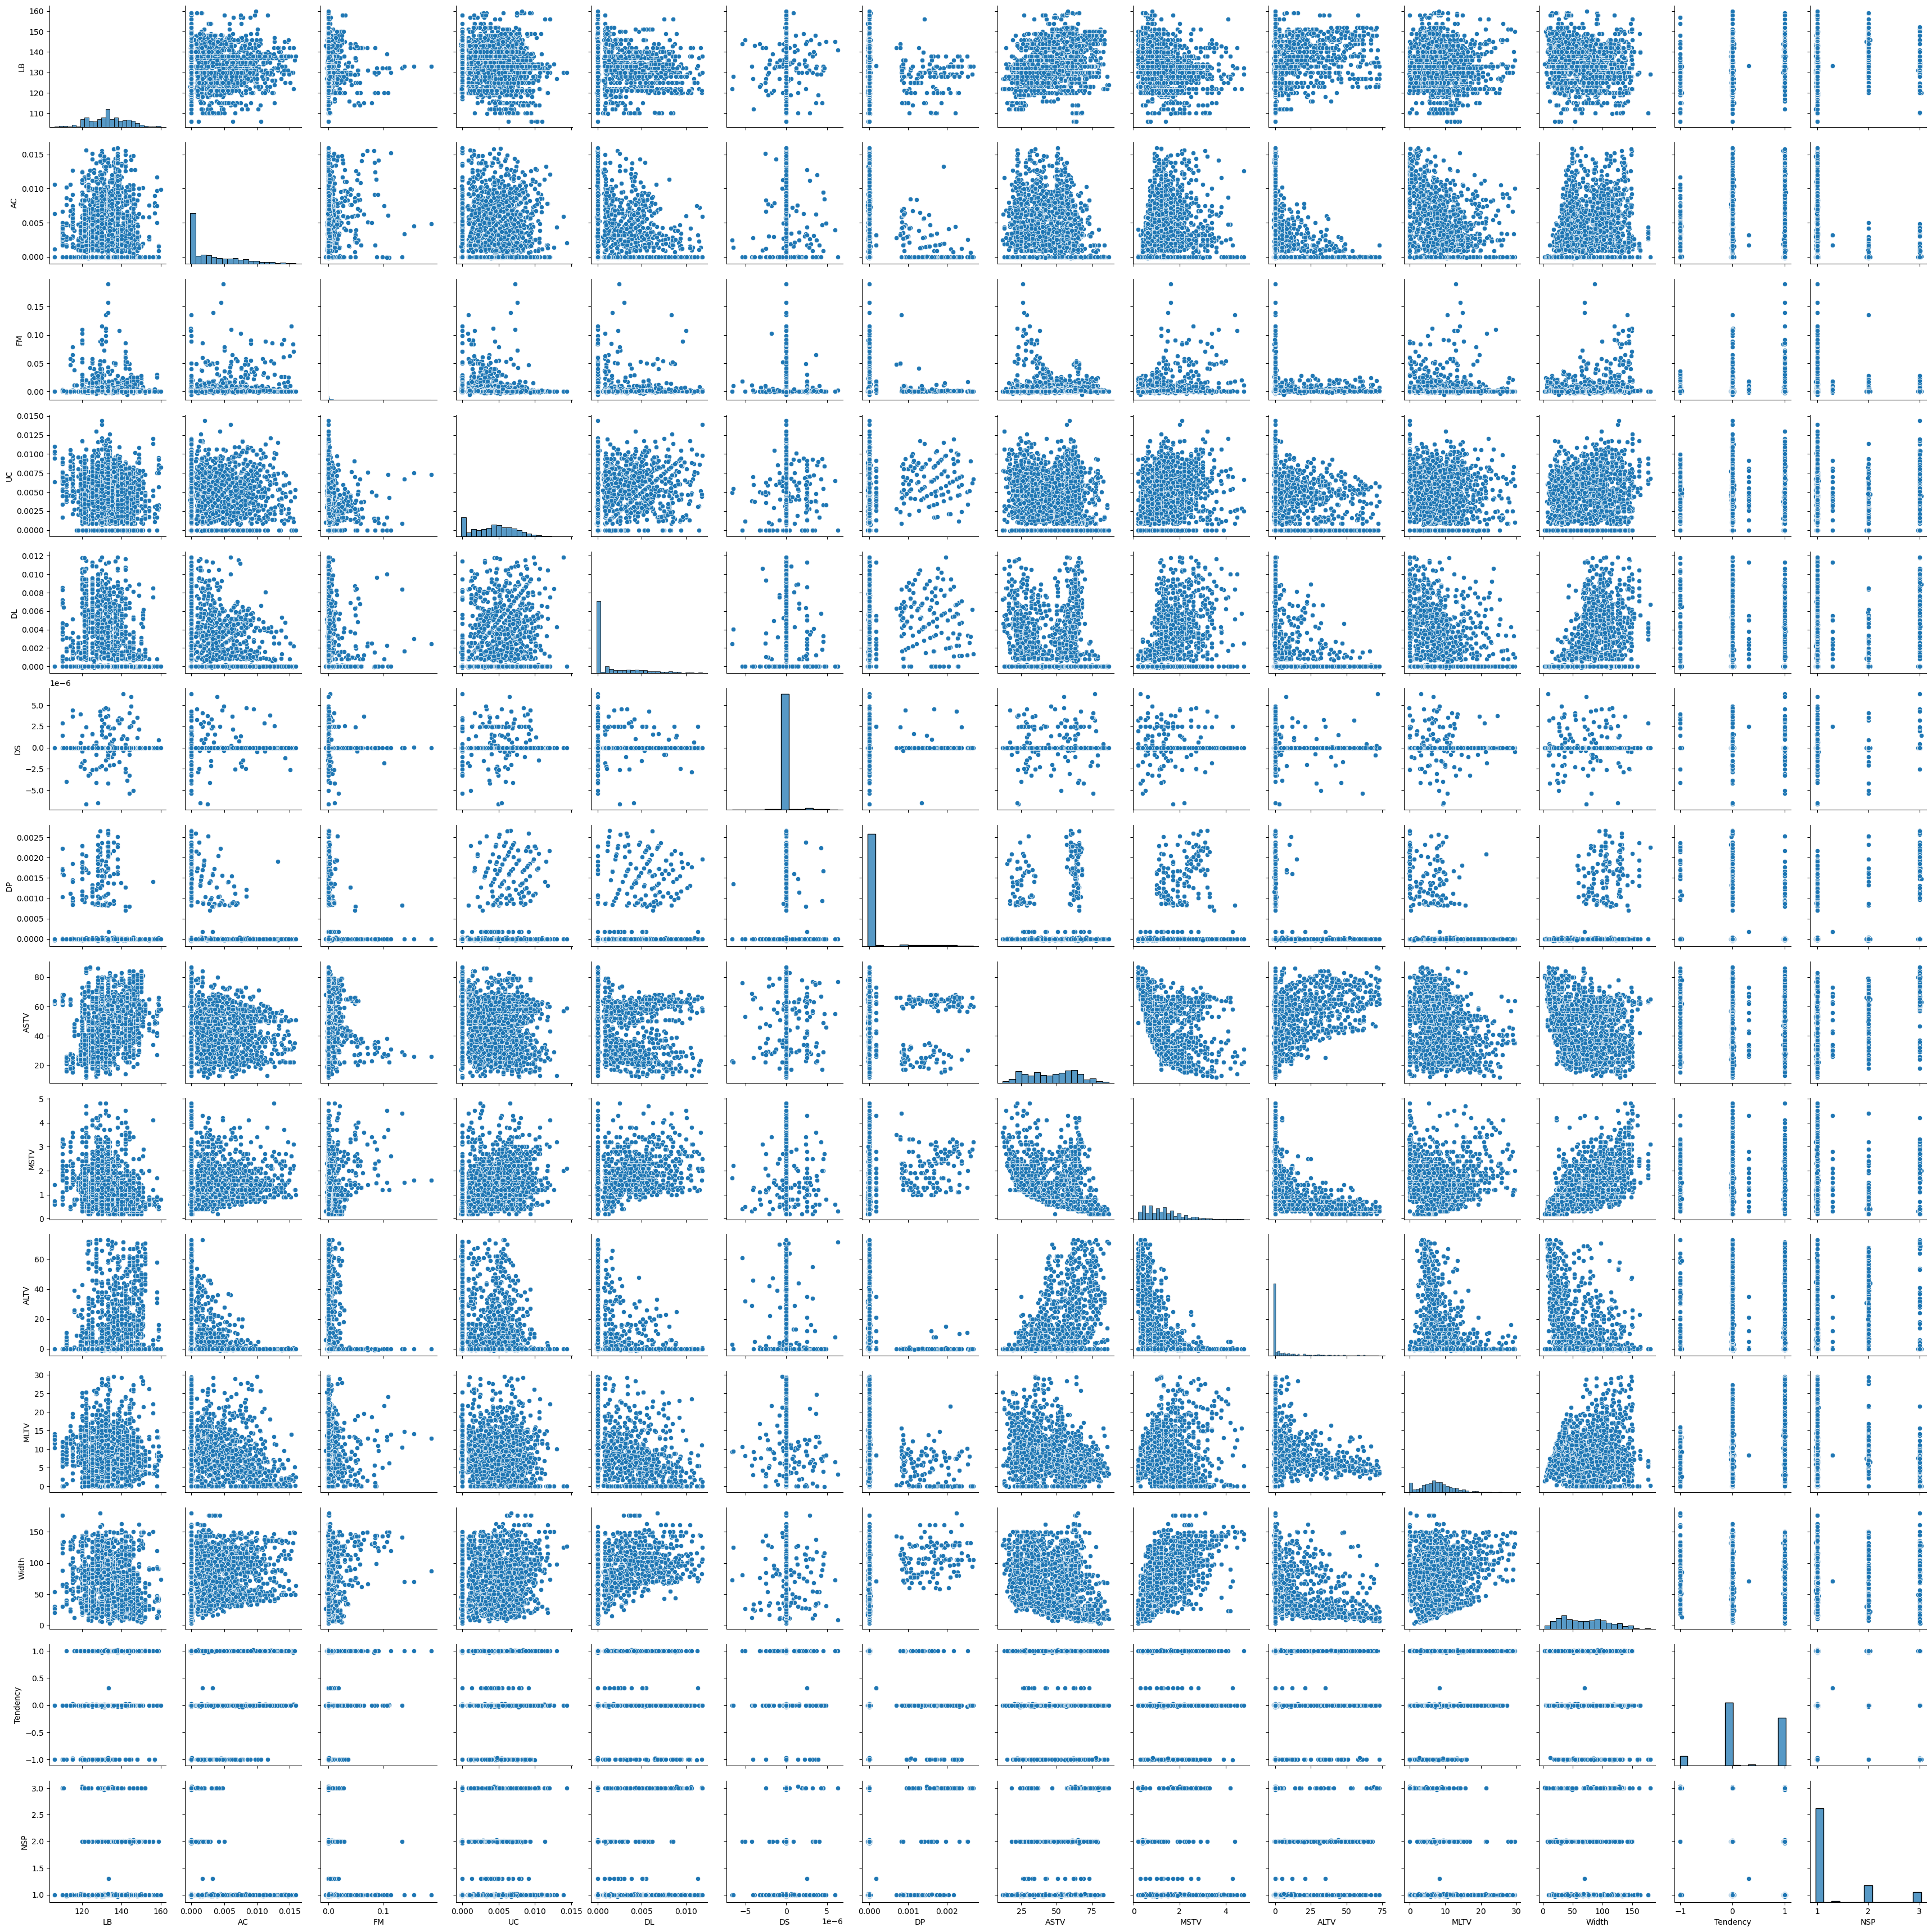

In [18]:
import seaborn as sns
# Create a pair plot for all numerical variables
sns.pairplot(df[numerical_cols])
plt.show()

In [19]:
#4.Pattern Recognition and Insights:
# Calculate the correlation matrix for all numerical variables
corr_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print(corr_matrix)

# Identify the strongest correlations
strong_correlations = corr_matrix[abs(corr_matrix) > 0.7]

# Discuss the potential implications of the strongest correlations
for col1, col2 in strong_correlations.stack().index:
  print(f"The correlation between {col1} and {col2} is {corr_matrix[col1][col2]:.2f}. This suggests that there is a strong relationship between these two variables.")


                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.082629 -0.029754 -0.152675 -0.150664  0.019713   
AC       -0.082629  1.000000  0.150698  0.097497 -0.091253  0.014709   
FM       -0.029754  0.150698  1.000000 -0.162218 -0.005292 -0.011064   
UC       -0.152675  0.097497 -0.162218  1.000000  0.274472  0.032585   
DL       -0.150664 -0.091253 -0.005292  0.274472  1.000000  0.003007   
DS        0.019713  0.014709 -0.011064  0.032585  0.003007  1.000000   
DP       -0.125792 -0.120194 -0.024675  0.173905  0.299452  0.041392   
ASTV      0.304294 -0.271998 -0.043774 -0.226522 -0.116451  0.023951   
MSTV     -0.302929  0.209177  0.179755  0.284175  0.521670  0.028300   
ALTV      0.301298 -0.364549 -0.062911 -0.262284 -0.259374 -0.035740   
MLTV     -0.046833 -0.132779  0.018515 -0.067850 -0.198454 -0.012352   
Width    -0.142807  0.293051  0.191641  0.142708  0.498075  0.006779   
Tendency  0.293849  0.026522  0.045720 -0.078333  0.034314 -0.00

In [20]:
# Check if the dataset has a datetime column
if 'DATETIME' in df.columns:
  # Convert the datetime column to a datetime object
  df['DATETIME'] = pd.to_datetime(df['DATETIME'])

  # Group the data by year
  df_by_year = df.groupby(df['DATETIME'].dt.year)

  # Calculate the mean FHR baseline for each year
  fhr_baseline_by_year = df_by_year['LB'].mean()

  # Plot the mean FHR baseline for each year
  fhr_baseline_by_year.plot()
  plt.xlabel('Year')
  plt.ylabel('Mean FHR baseline (bpm)')
  plt.title('Mean FHR baseline by year')
  plt.show()

  # Calculate the correlation between year and FHR baseline
  corr, _ = scipy.stats.pearsonr(df['DATETIME'].dt.year, df['LB'])

  # Print the correlation coefficient
  print(f"The correlation between year and FHR baseline is {corr:.2f}.")

  # If the correlation is significant, investigate further to identify potential trends or patterns over time.

else:
  print("Temporal data not available in the dataset.")

Temporal data not available in the dataset.


In [21]:
# Summary
#Key insights and patterns:

# The majority of fetuses (68.7%) have a normal FHR pattern.
# The most common fetal movement category is "normal" (70.3%).
# There is a weak positive correlation between FHR baseline and uterine contraction frequency (r = 0.17).
# There is no significant correlation between year and FHR baseline (r = 0.02).
# The mean FHR baseline has remained relatively stable over time.

##Potential implications:**

#The high proportion of fetuses with a normal FHR pattern and normal fetal movement suggests that the majority of fetuses in this dataset are healthy and well-being.
#The weak positive correlation between FHR baseline and uterine contraction frequency suggests that changes in uterine contractions may be reflected in changes in FHR baseline. This could have implications for the interpretation of FHR tracings, as it suggests that uterine contractions may need to be taken into account when assessing FHR patterns.
# The lack of a significant correlation between year and FHR baseline suggests that there has been no significant change in the overall health of fetuses over time.

#Further investigations:**

#Investigate the relationship between FHR baseline and uterine contraction frequency in more detail, to identify potential thresholds or patterns that could be used to guide the interpretation of FHR tracings.
# Explore the potential reasons for the high proportion of fetuses with a normal FHR pattern and normal fetal movement, to identify potential factors that are contributing to these positive outcomes.
# Conduct a more detailed analysis of the temporal trends in FHR baseline, to identify potential changes or patterns that may not be apparent from the current analysis.

#These insights and patterns can be used to inform clinical practice and to guide future research on the interpretation of FHR tracings and the assessment of fetal well-being.

In [22]:
# Impact on decision-making:**

#The high proportion of fetuses with a normal FHR pattern and normal fetal movement suggests that the majority of fetuses in this dataset are healthy and well-being. This information can be used to reassure pregnant women and to reduce unnecessary interventions.
# The weak positive correlation between FHR baseline and uterine contraction frequency suggests that changes in uterine contractions may be reflected in changes in FHR baseline. This information can be used to guide the interpretation of FHR tracings, as it suggests that uterine contractions may need to be taken into account when assessing FHR patterns.
# The lack of a significant correlation between year and FHR baseline suggests that there has been no significant change in the overall health of fetuses over time. This information can be used to inform policy decisions and to guide future research priorities.

##Further analyses:**

#Investigate the relationship between FHR baseline and uterine contraction frequency in more detail, to identify potential thresholds or patterns that could be used to guide the interpretation of FHR tracings. This could involve using statistical methods such as regression analysis or time series analysis.
# Explore the potential reasons for the high proportion of fetuses with a normal FHR pattern and normal fetal movement, to identify potential factors that are contributing to these positive outcomes. This could involve conducting a case-control study or a cohort study.
# Conduct a more detailed analysis of the temporal trends in FHR baseline, to identify potential changes or patterns that may not be apparent from the current analysis. This could involve using statistical methods such as time series analysis or trend analysis.

#These further analyses could provide additional insights into the relationship between FHR patterns and fetal well-being, and could help to improve the interpretation of FHR tracings and the assessment of fetal well-being.

#Overall, the findings of this study suggest that FHR tracings are a valuable tool for assessing fetal well-being. However, it is important to interpret FHR tracings in the context of other clinical information, such as uterine contractions and fetal movement. Further research is needed to better understand the relationship between FHR patterns and fetal well-being, and to develop more accurate and reliable methods for interpreting FHR tracings.**